**Steps to follow:-**


1.   Importing Various Library
2.   Loading Dataset

1.   Basic Sanity Check
2.   Exploratory Data Analysis

1.   Splitting Dataset/ preprocessing data 
2.   Build Ensemble based model and hypertuning

1.   Build Boosting Based Algorithms hypertuning
2.   Evaluation of models on various aspect like 


> > Time taken to learn model <br>
> > Performance of Model on compltely Unseen data.

9. Conclusion


















### About Dataset 
This Data set contains the information related red wine , Various factors affecting the quality. This data set was prepossessed and downloaded from the UCI Machine Learning Repository. This data set was simple, cleaned, practice data set for classification modelling. Source of this Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
from google.colab import drive
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
os.getcwd()
import warnings
warnings.filterwarnings("ignore")

In [4]:
wine_df=pd.read_csv("wine.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
# Some columns may have outliers We will use distplot to check.

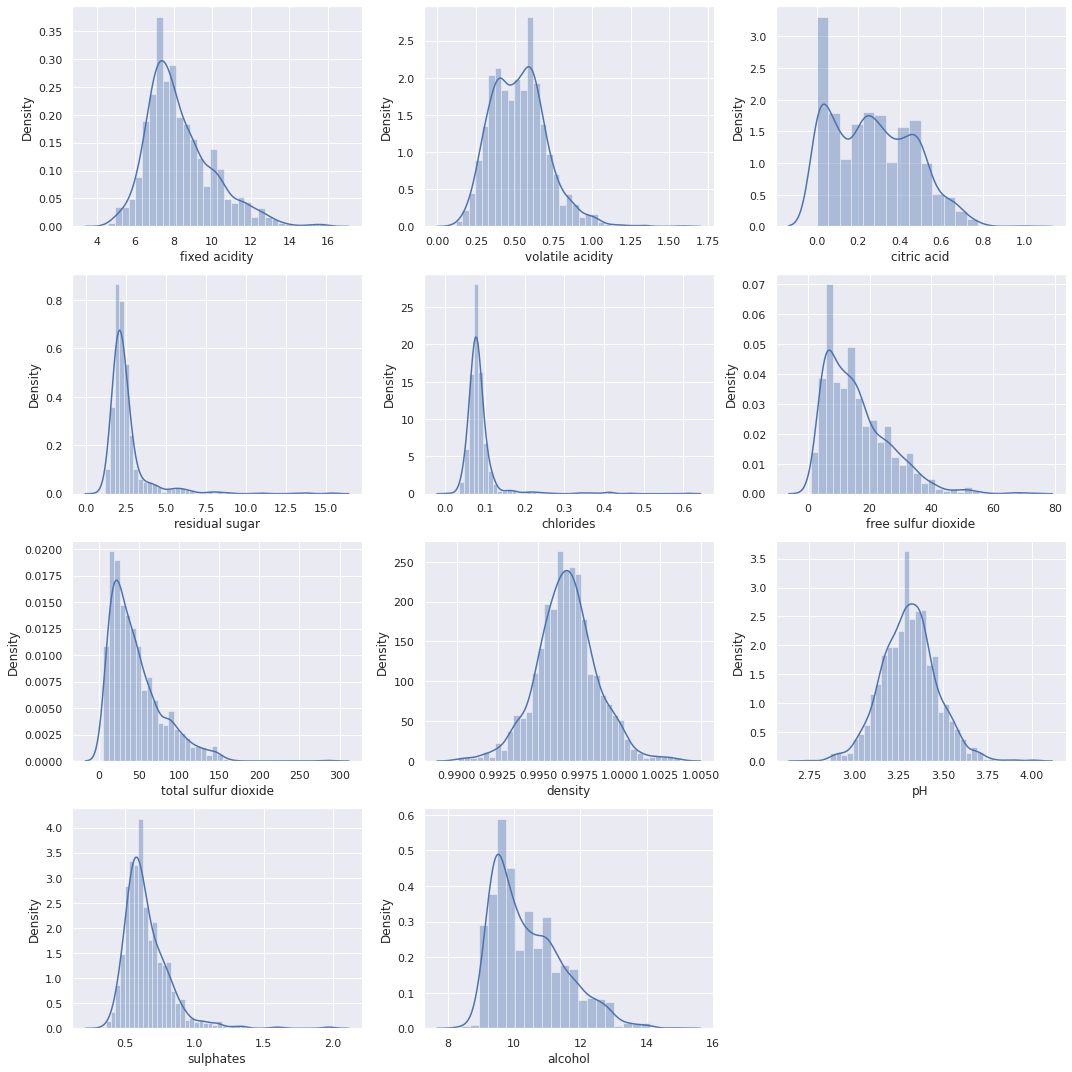

In [8]:
plt.figure(figsize=(15,15))
for plot in enumerate(wine_df.columns):
    if plot[1]  != "quality":
        plt.subplot(4,3,plot[0]+1)
        sns.distplot(wine_df[plot[1]])
        plt.tight_layout()
plt.show()


 residual sugar and chloride have some outlier <br>
 Treatment of Outliers depend on ehat type of outliers is <br>
 In this particular case we will keep this because we don't want to loose data.<br>

  We don't have any null values <br>
  We have outliers but we have decided to keep them <br>
  We didn't find any data disperency <br>
 

### EDA wrt to Target coluum

<Figure size 1080x1080 with 0 Axes>

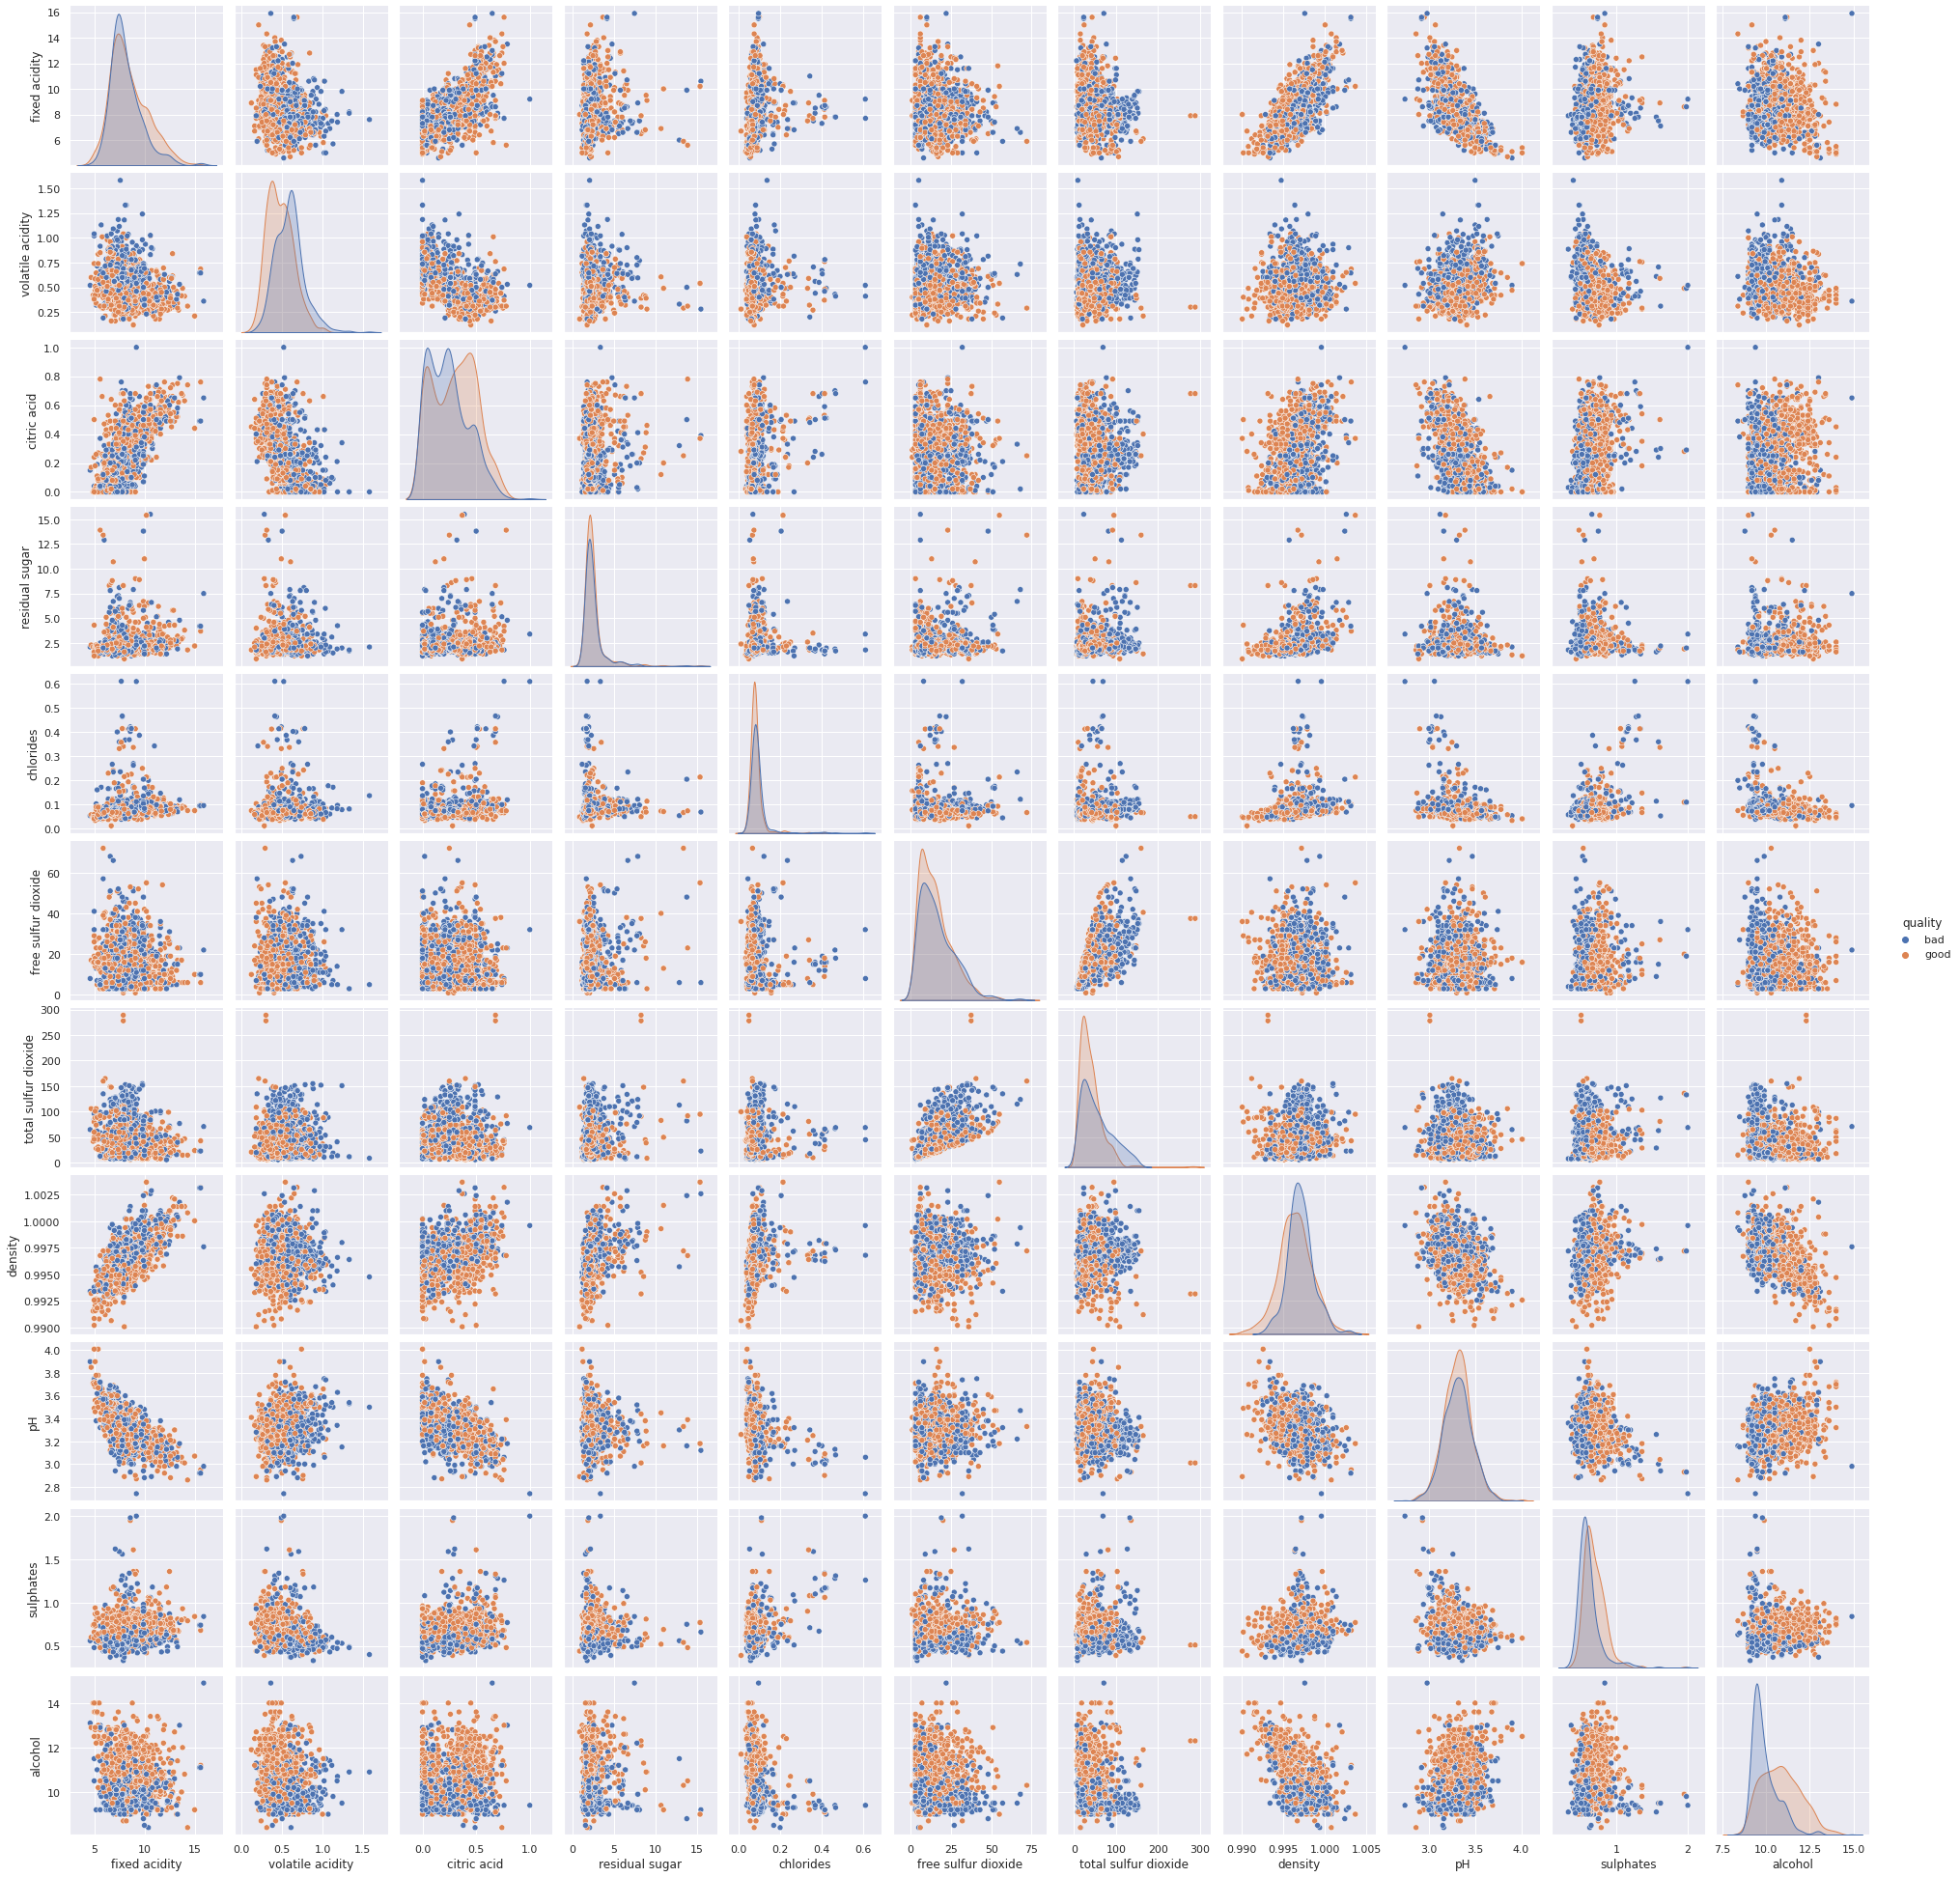

In [12]:
plt.figure(figsize=(15,15))
sns.pairplot(wine_df,hue='quality')

Some key points to be noted <br>
Features like Fixed Acidity,residual sugar,chlorides,pH Cannot be good predictor and reason for that we can se so much<br>overlapping of good qual and bad qual wine in them.<br>
While columns like alcohol,total sulphur dioxide are very good predictor<br>
For other remainig columns we r not sure as there is overlapping as much extent but some clear pattern is also availabe<br>

In [14]:
# mapping quality column good =1 and bad =0, We cannot plot heat map with string values
wine_df['quality']=wine_df['quality'].map({'good':1,'bad':0})

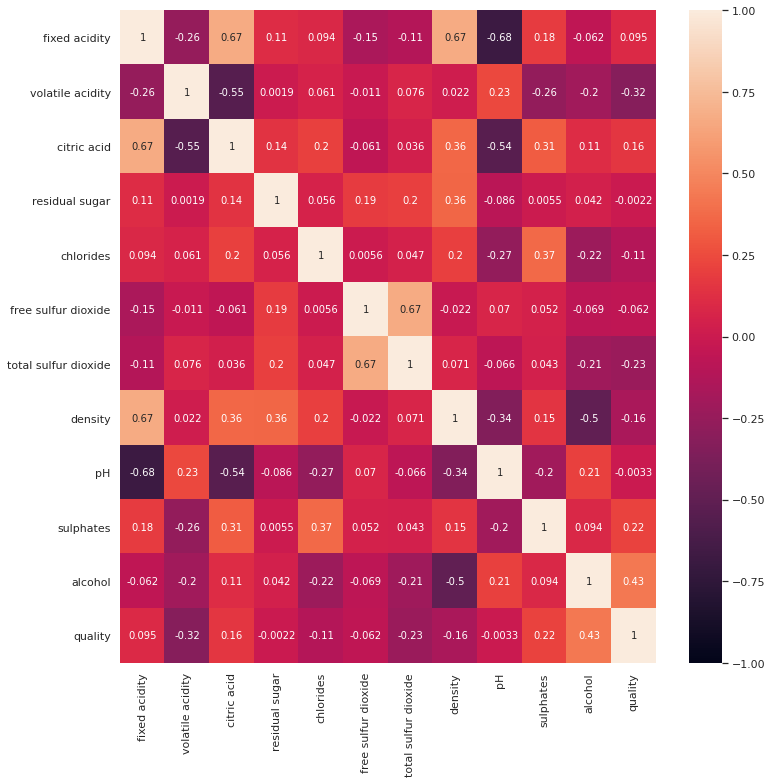

In [15]:
# Plotting Heatmap to check correlation coefficient
plt.figure(figsize=(12,12))
sns.heatmap(wine_df.corr(),vmin=-1,annot=True)

we can see volatile acidity, sulphates,alcohol arr corelated to quality <br>
apart from them we can see some multi collinearity in some columns <br>
But we r going to build boosting and ensemble based model which internally they use tree base algorithms and tree based <br> algorithms are immune to multicollineraity <br>


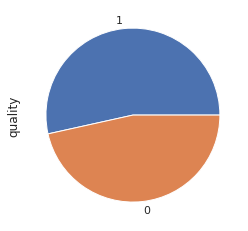

In [17]:
wine_df['quality'].value_counts().plot.pie()
plt.show()

### We can see We dont have data imbalance problem 
We will choose accuracy as scoring parameter

In [19]:
# Dividing predictor and target columns
X=wine_df.drop("quality",1)
y=wine_df["quality"]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)

In [21]:
print("X_train size {},y_train size {}, X_test size {}, y_test size {}".format(X_train.shape,y_train.shape,X_test.shape,\
                                                                            y_test.shape))

X_train size (1119, 11),y_train size (1119,), X_test size (480, 11), y_test size (480,)


### Random FOrest 

In [ ]:


%%time
from sklearn.ensemble import  RandomForestClassifier

# making ensmeble based model model
# with default parameter 
rf= RandomForestClassifier(max_depth=3,)
rf.fit(X_train,y_train)



In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
y_train_pred_rf=rf.predict(X_train)
accuracy_score(y_train,y_train_pred_rf)

0.7810545129579982

In [25]:
# Now we will perform 5 fold as we don't have much data and also do  hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
rf_1=RandomForestClassifier()
folds=KFold(n_splits = 5, shuffle = True, random_state = 100)
params = {'max_depth':[2,3,4,5,8,12,15,20],\
          "max_features":[2,3,5,8,10,11],\
          "max_leaf_nodes":[2,3,5,20,10,50,100],
          "n_estimators":[20,50,100,150,200,500]}


In [26]:
grid_search_rf= GridSearchCV(estimator=rf_1, 
                           param_grid=params, 
                           cv=folds,return_train_score= True, n_jobs=-1, verbose=5, scoring = "accuracy")


In [27]:
%%time
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2174 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 3524 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | ela

CPU times: user 42.1 s, sys: 1.24 s, total: 43.3 s
Wall time: 49min 28s


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_f...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [28]:
  best_e=grid_search_rf.best_estimator_
  

In [29]:
grid_search_rf.best_score_

0.817709000640615

In [30]:
grid_search_rf.best_params_

{'max_depth': 12,
 'max_features': 3,
 'max_leaf_nodes': 100,
 'n_estimators': 150}

In [31]:
rf_score=pd.DataFrame(grid_search_rf.cv_results_).head()

In [32]:
rf_final=RandomForestClassifier(max_depth= 20, max_features= 8, max_leaf_nodes= 100,n_estimators= 200)


In [33]:
%%time
rf_final.fit(X_train,y_train)

CPU times: user 766 ms, sys: 3.97 ms, total: 769 ms
Wall time: 773 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# Checking peroformance in completely undeen data

y_test_final_rf=rf_final.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_final_rf)
print("test accuracy socore {}".format(test_accuracy))

test accuracy socore 0.7895833333333333


In [38]:
# Before applying boosting based algorithms We shuold scale our data
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()


In [39]:
X_train_=scalar.fit_transform(X_train)

# Gradient Boosting 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [41]:
params={"max_depth":[2,5,8,10,12,20],"n_estimators":[20,50,100,150,200],"learning_rate": [0.001,0.005,0.1,0.5,0.8],"subsample": [0.3, 0.6, 0.9]}


In [44]:
grid_search_GBC = GridSearchCV(gbc, 
                               cv = folds,
                               param_grid=params, 
                               scoring = 'accuracy', 
                               return_train_score=True,                         
                               verbose = 5)

In [45]:
%%time
grid_search_GBC.fit(X_train_,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.541, test=0.509), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.531, test=0.549), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.532, test=0.545), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.522, test=0.585), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.3, score=(train=0.547, test=0.484), 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.6, score=(train=0.532, test=0.545), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.6, score=(train=0.522, test=0.585), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.6, score=(train=0.547, test=0.484), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.9 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.9, score=(train=0.541, test=0.509), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.9 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.9, score=(train=0.531, test=0.549), total=   0.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=20, subsample=0.9 
[CV]  learning_rate=0.001, max_depth=2, n_estimato

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed: 18.4min finished


CPU times: user 18min 26s, sys: 1.35 s, total: 18min 27s
Wall time: 18min 26s


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_...
                                                  random_state=None,
                                   

In [46]:
 grid_search_GBC.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
grid_search_GBC.best_score_

0.8195107303010891

In [48]:
score_gbc=pd.DataFrame(grid_search_GBC.cv_results_)
score_gbc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021787,0.001334,0.000565,0.000040,0.001,2,20,0.3,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.508929,0.549107,0.544643,0.584821,0.484305,0.534361,0.034704,430,0.540782,0.530726,0.531844,0.521788,0.546875,0.534403,0.008666
1,0.029750,0.002682,0.000596,0.000052,0.001,2,20,0.6,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.508929,0.549107,0.544643,0.584821,0.484305,0.534361,0.034704,430,0.540782,0.530726,0.531844,0.521788,0.546875,0.534403,0.008666
2,0.033211,0.001522,0.000573,0.000050,0.001,2,20,0.9,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.508929,0.549107,0.544643,0.584821,0.484305,0.534361,0.034704,430,0.540782,0.530726,0.531844,0.521788,0.546875,0.534403,0.008666
3,0.052296,0.001575,0.000721,0.000044,0.001,2,50,0.3,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.508929,0.549107,0.544643,0.584821,0.484305,0.534361,0.034704,430,0.540782,0.530726,0.531844,0.521788,0.546875,0.534403,0.008666
4,0.067479,0.000553,0.000685,0.000048,0.001,2,50,0.6,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.508929,0.549107,0.544643,0.584821,0.484305,0.534361,0.034704,430,0.540782,0.530726,0.531844,0.521788,0.546875,0.534403,0.008666


In [49]:
grid_search_GBC.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.6}

In [50]:
# making final gradientboosting algorithm
GBC_final=GradientBoostingClassifier(learning_rate=0.1,max_depth=20,n_estimators=150,subsample=0.3)

In [51]:
%%time
GBC_final.fit(X_train_,y_train)

CPU times: user 1.34 s, sys: 5 µs, total: 1.34 s
Wall time: 1.35 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.3, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
X_test_=scalar.transform(X_test)

In [70]:

# Checking peroformance in completely undeen data
y_test_final_gbc=rf_final.predict(X_test_)
test_accuracy_gbc=accuracy_score(y_test,y_test_final_gbc)
print("test accuracy socore {}".format(test_accuracy_gbc))

test accuracy socore 0.5583333333333333


# Ada BOost

In [54]:
# ADA BOost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
ada= AdaBoostClassifier(
    base_estimator=tree,
    algorithm="SAMME")

In [55]:
params={"base_estimator__max_depth" : [2, 5,10,15,20],
        "base_estimator__max_leaf_nodes":[2,3,5,20,10,50,100],
        "n_estimators": [50,100,150,200, 400, 600],
             }

In [56]:
grid_search_ABC=GridSearchCV(ada,param_grid=params,cv=folds,scoring="accuracy",verbose=1)

In [57]:
%%time
grid_search_ABC.fit(X_train_,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed: 14.9min finished


CPU times: user 14min 52s, sys: 995 ms, total: 14min 53s
Wall time: 14min 54s


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                          

In [58]:
# 
grid_search_ABC.best_params_

{'base_estimator__max_depth': 15,
 'base_estimator__max_leaf_nodes': 100,
 'n_estimators': 200}

In [59]:
score_abc=pd.DataFrame(grid_search_ABC.cv_results_)
score_abc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_base_estimator__max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112844,0.001668,0.004762,0.001207,2,2,50,"{'base_estimator__max_depth': 2, 'base_estimat...",0.741071,0.750000,0.741071,0.696429,0.766816,0.739078,0.023305,206
1,0.228606,0.005974,0.008095,0.001166,2,2,100,"{'base_estimator__max_depth': 2, 'base_estimat...",0.750000,0.758929,0.750000,0.687500,0.766816,0.742649,0.028279,201
2,0.332524,0.002318,0.010906,0.000136,2,2,150,"{'base_estimator__max_depth': 2, 'base_estimat...",0.750000,0.754464,0.758929,0.718750,0.762332,0.748895,0.015634,196
3,0.443668,0.003293,0.014277,0.000400,2,2,200,"{'base_estimator__max_depth': 2, 'base_estimat...",0.750000,0.763393,0.754464,0.709821,0.766816,0.748899,0.020447,191
4,0.882306,0.009566,0.027858,0.000965,2,2,400,"{'base_estimator__max_depth': 2, 'base_estimat...",0.741071,0.772321,0.758929,0.714286,0.793722,0.756066,0.027059,176


In [77]:
grid_search_ABC.best_score_

0.8194867072389493

In [69]:
# Checking peroformance in completely undeen data
y_test_final_abc=grid_search_ABC.predict(X_test_)
test_accuracy_abc=accuracy_score(y_test,y_test_final_abc)
print(" test accuracy socore {}".format(test_accuracy_abc))

 test accuracy socore 0.7854166666666667


# XGBoost Classifier

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier

In [63]:
xgb_model=XGBClassifier(tree_method='gpu_hist', gpu_id=0)

In [64]:
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
              "max_depth":[2,3,5,8,10,15,20],
              "n_estimators":[20,50,80,120,200]
              }          

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [65]:
%%time
model_cv_xgb.fit(X_train_,y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:  8.6min finished


CPU times: user 6min 33s, sys: 2min 7s, total: 8min 41s
Wall time: 8min 39s


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='gpu_hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0

In [66]:
 model_cv_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [67]:
model_cv_xgb.best_score_

0.8177130044843051

In [68]:
# Checking peroformance in completely undeen data
y_test_final_xgb=model_cv_xgb.predict(X_test_)
test_accuracy=accuracy_score(y_test,y_test_final_xgb)
print("test accuracy socore {}".format(test_accuracy))

test accuracy socore 0.7708333333333334


#  Lets compare various model 

## Random Forest 
Time Taken to train 5 folds for each of 2016 candidates, totalling 10080 fits : 49min 28s <br>
best score : 0.817709000640615 <br>
Accuracy on test dataset : 0.7895833333333333
---------------------------------------------------------------------------------------------
## Gradient boosting
Fitting 5 folds for each of 450 candidates, totalling 2250 fits: 18min 26s <br>
best score:0.8195107303010891 <br>
Accuracy: 0.5583333333333333
---------------------------------------------------------------------------------------------
## Adaboost 
Fitting 5 folds for each of 210 candidates, totalling 1050 fits: 14min 54s <br>
best score : 0.8194867072389493 <br>
Accuracy on test dataset: 0.7854166666666667
---------------------------------------------------------------------------------------------
## XG boost
Fitting 5 folds for each of 210 candidates, totalling 1050 fits: 8min 39s <br>
best score: 0.8177130044843051 <br>
Accuracy on test dataset : 0.7708333333333334 <br>

In [76]:
# time taken for each fits
print("time taken in Random Forest ",10080/(49*60+28))
print("time taken in Gradient BOosting ",2250/(18*60+26))
print("time taken in Ada Boost ",1050/(14*60+54))
print("time taken in XG Boost ",1050/(8*60+39))

time taken in Random Forest  3.3962264150943398
time taken in Gradient BOosting  2.034358047016275
time taken in Ada Boost  1.174496644295302
time taken in XG Boost  2.023121387283237


# Conclusion 
#### gradient boosting algorithm is not doing well on unseen data
#### Xgboost is out performed by random forest and ada boost in terms accuracy in test data 
#### In between Ada Boost and Random Forest if we compare time as well as accuracy on test data set 
#### We will found that random forest took more time to train each fit took atleast of 3.3 sec where as ada boost each fit took 1.13 and accuracy score on unseen data not much difference.

## We will go with Ada Boost
